In [20]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline

In [228]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

## Корреляционный анализ

### Коэффициенты корреляции

<a href=https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr>`pearsonr`</a>,
<a href=https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr>`spearmanr`</a>,
<a href=https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html#scipy.stats.kendalltau>`kendalltau`</a> - коэффициенты корреляции Пирсона, Спирмана, Кендалла.

Общий принцип: `f(x_1, x_2) = (correlation, pvalue)`

Упорядоченные по возрастанию наборы данных

In [345]:
x1, x2 = np.arange(5), np.arange(5) + 6
print('Выборки:', x1, x2)
sps.pearsonr(x1, x2), sps.spearmanr(x1, x2), sps.kendalltau(x1, x2)

Выборки: [0 1 2 3 4] [ 6  7  8  9 10]


((1.0, 0.0),
 SpearmanrResult(correlation=0.99999999999999989, pvalue=1.4042654220543672e-24),
 KendalltauResult(correlation=0.99999999999999989, pvalue=0.01430588102433256))

Одна по возрастанию, другая по убыванию.

In [346]:
print('Выборки:', x1, -x2)
sps.pearsonr(x1, -x2), sps.spearmanr(x1, -x2), sps.kendalltau(x1, -x2)

Выборки: [0 1 2 3 4] [ -6  -7  -8  -9 -10]


((-1.0, 0.0),
 SpearmanrResult(correlation=-0.99999999999999989, pvalue=1.4042654220543672e-24),
 KendalltauResult(correlation=-0.99999999999999989, pvalue=0.01430588102433256))

Корреляция с каким-то другим набором

In [347]:
x2 = [4, 8, 2, 5, 1]
print('Выборки:', x1, x2)
sps.pearsonr(x1, x2), sps.spearmanr(x1, x2), sps.kendalltau(x1, x2)

Выборки: [0 1 2 3 4] [4, 8, 2, 5, 1]


((-0.51961524227066314, 0.36951722839383189),
 SpearmanrResult(correlation=-0.49999999999999994, pvalue=0.39100221895577053),
 KendalltauResult(correlation=-0.39999999999999997, pvalue=0.32718689066087681))

Если у одного набора поменять знак, то коэффициенты корреляции сменят знак

In [348]:
print('Выборки:', -x1, x2)
sps.pearsonr(-x1, x2), sps.spearmanr(-x1, x2), sps.kendalltau(-x1, x2)

Выборки: [ 0 -1 -2 -3 -4] [4, 8, 2, 5, 1]


((0.51961524227066314, 0.36951722839383189),
 SpearmanrResult(correlation=0.49999999999999994, pvalue=0.39100221895577053),
 KendalltauResult(correlation=0.39999999999999997, pvalue=0.32718689066087681))

Некоторые вспомогательные функции для отрисовки графиков.

In [349]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        y = rect.get_y()
        plt.text(rect.get_x() + rect.get_width()/2., 
                 -0.2 if y >= 0 else 0.07,
                 '%.2f' % (height * (-1 if y < 0 else 1)),
                 ha='center', va='bottom', fontsize=16)

In [350]:
def draw_graphics(x1, x2):
    r, pr = sps.pearsonr(x1, x2)
    rho, prho = sps.spearmanr(x1, x2)
    tau, ptau = sps.kendalltau(x1, x2)
    colors = [('red' if pr < 0.05 else 'blue'), 
              ('red' if prho < 0.05 else 'blue'), 
              ('red' if ptau < 0.05 else 'blue')]
    titles = ['$\\widehat{\\rho}$', '$\\rho_S$', '$\\tau$']

    plt.figure(figsize=(13, 4))

    plt.subplot(1, 3, 1)
    plt.scatter(x1, x2, alpha=0.5, s=10)
    plt.axis('equal')
    plt.title('sample', fontsize=16)

    plt.subplot(1, 3, 2)
    rects = plt.bar([1, 2, 3], [r, rho, tau], color=colors)
    plt.hlines(0, 0.4, 3.6, color='black', alpha=0.5)
    autolabel(rects)
    plt.xticks([1, 2, 3], titles, fontsize=16)
    plt.title('correlation', fontsize=16)
    plt.xlim((0.4, 3.6)), plt.ylim((-1, 1))

    plt.subplot(1, 3, 3)
    plt.bar([1, 2, 3], [pr, prho, ptau], color=colors)
    plt.hlines(0.05, 0.4, 3.6, color='red', alpha=0.5, lw=3)
    plt.xticks([1, 2, 3], titles, fontsize=16)
    plt.title('pvalue', fontsize=16)
    plt.xlim((0.4, 3.6)), plt.ylim((-0.01, 1))

    plt.show()

### *Везде ниже выборка изображается на графике без искажений, то есть масштаб по обеим осям совпадает. Столбцы отвечают за коэффициенты корреляции Пирсона, Спирмена и Кенделла соответственно. Если столбец красный, то гипотеза о независимости (точнее, некоррелированности) отвергается.*

**Задача на счет №1.**  На Физтехе проведено исследование на выявление зависимости между успеваемостью студента (x2) и средним количеством пончиков (x1), съеденным им за день. Проверить гипотезу о независимости успеваемости и количества съеденных пончиков на уровне значимости 0,05.

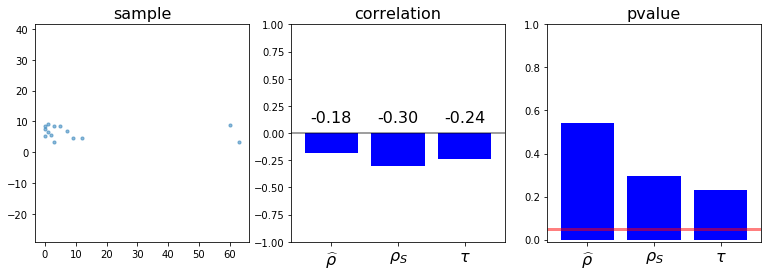

In [351]:
x1 = [12, 1, 3, 7, 3, 5, 1, 0, 60, 63, 2, 9, 0, 0]
x2 = [4.5, 9.2, 8.5, 6.9, 3.4, 8.5, 6.7, 5.4, 8.8, 3.2, 5.6, 4.6, 7.4, 8.5]
draw_graphics(x1, x2)

**Задача на счет №2.** Британские учёные установили, что успешность карьеры женщин (x2) зависит от длины второй фаланги мизинца их левой ноги (x1). Был проведен опрос 12 женщин. Проверить гипотезу о независимости успешности карьеры женщин от длины фаланги мизинца левой ноги на уровне значимости 0,05.

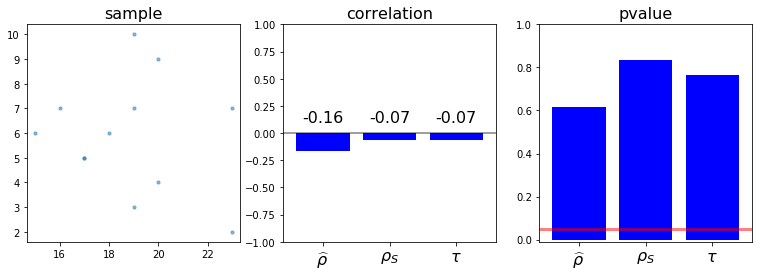

In [336]:
x1 = [19, 16, 15, 20, 23, 19, 17, 20, 23, 18, 17, 19]
x2 = [10, 7, 6, 4, 7, 3, 5, 9, 2, 6, 5, 7]
draw_graphics(x1, x2)

Зависимость коэффициентов корреляции от выборок. Выборки из равномерного распределения по прямой $y=x$ при $x \in [-1, 1]$ размазывается вдоль прямой $y=-x$.

In [1]:
for i in range(15):
    x = sps.uniform(loc=-1, scale=2).rvs(size=100)
    y = sps.uniform(loc=-0.1*i, scale=0.2*i).rvs(size=100)
    draw_graphics(x + y, x - y)

NameError: name 'sps' is not defined

Выборки расположены вдоль поворачивающейся прямой. Если одна из выборок принимает только одно значение, то коэффициент корреляции неопределен.

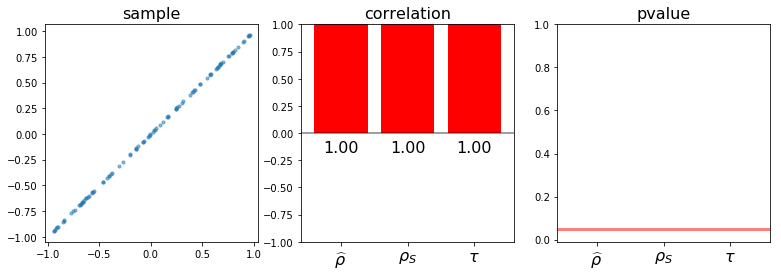

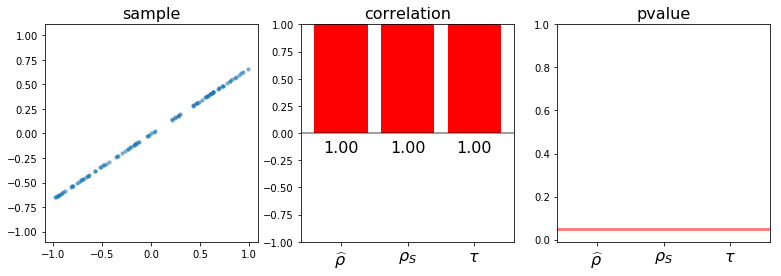

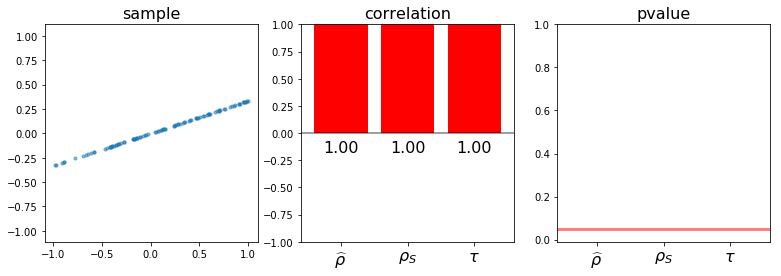

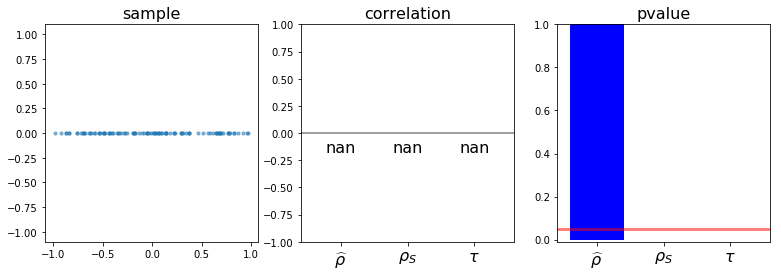

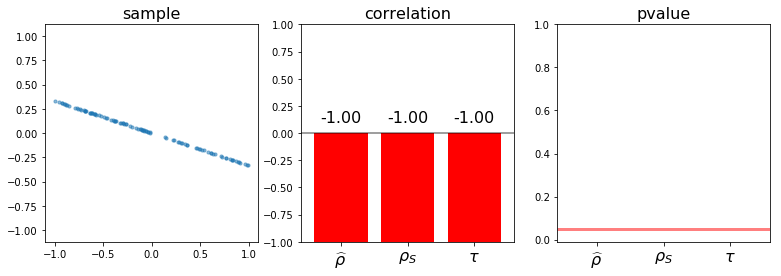

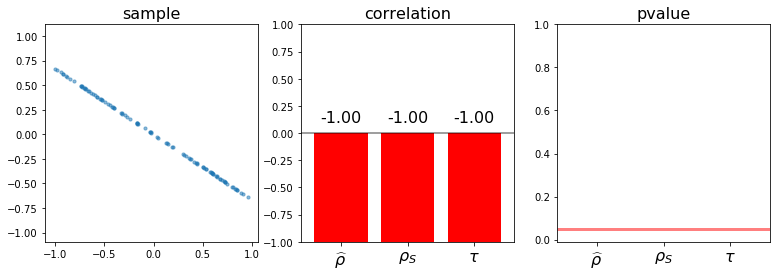

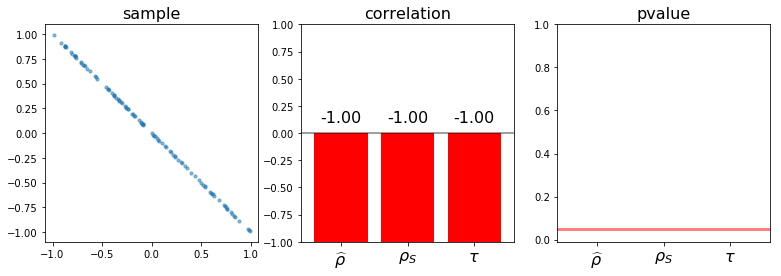

In [355]:
for i in range(7):
    x = sps.uniform(loc=-1, scale=2).rvs(size=100)
    draw_graphics(x, x * (1 - i/3))

Выборка размера 100 из двумерного нормального распределения.

Истинная корреляция: 0.0


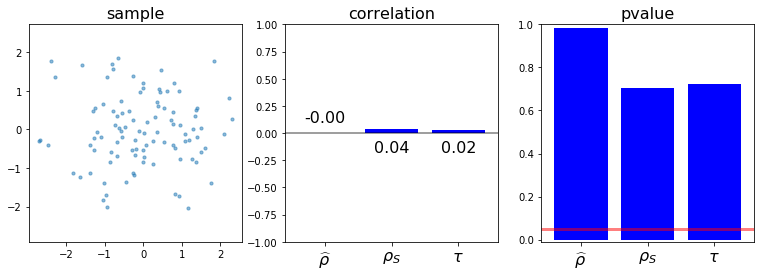

Истинная корреляция: 0.1


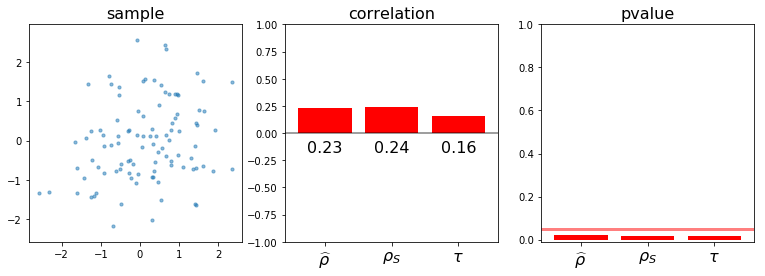

Истинная корреляция: 0.2


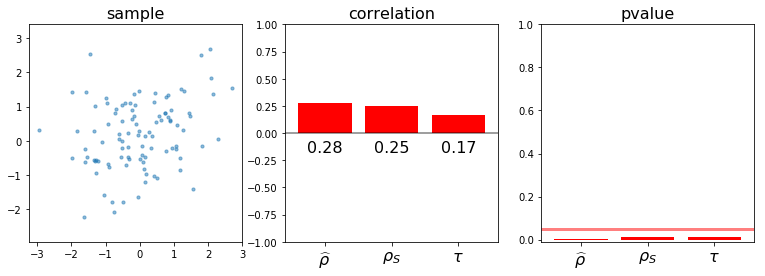

Истинная корреляция: 0.3


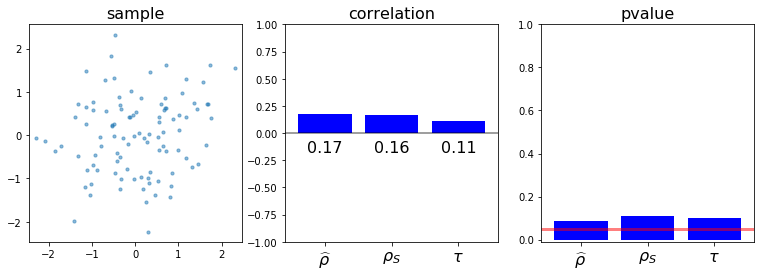

Истинная корреляция: 0.4


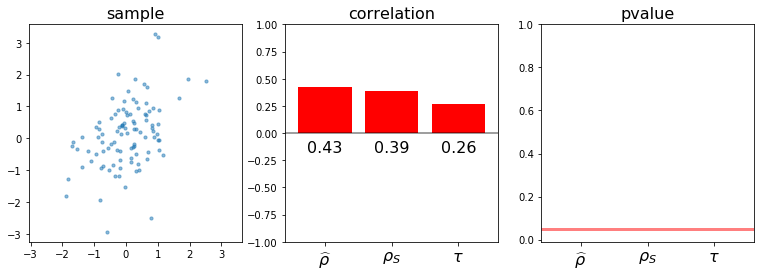

Истинная корреляция: 0.5


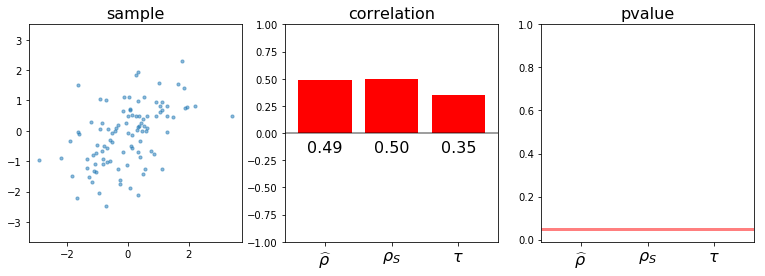

Истинная корреляция: 0.6


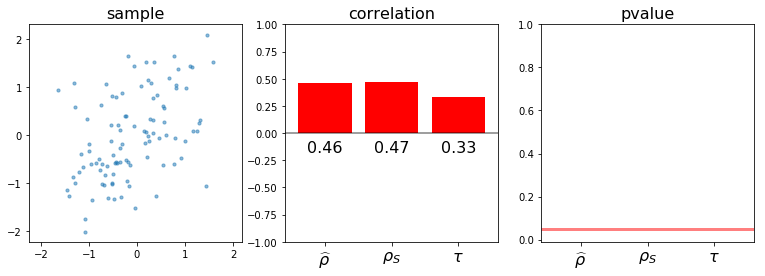

Истинная корреляция: 0.7


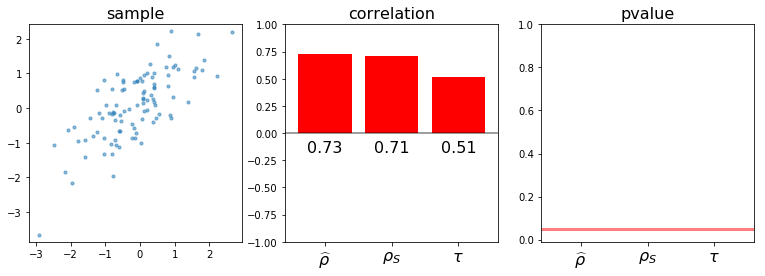

Истинная корреляция: 0.8


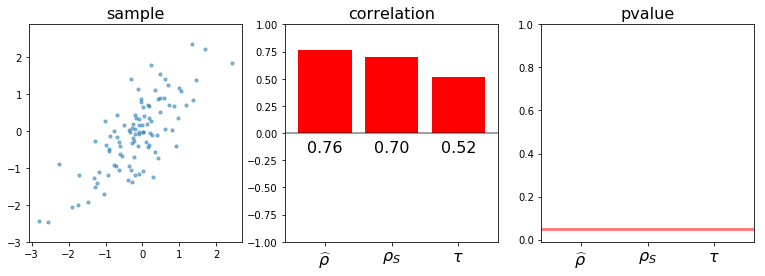

Истинная корреляция: 0.9


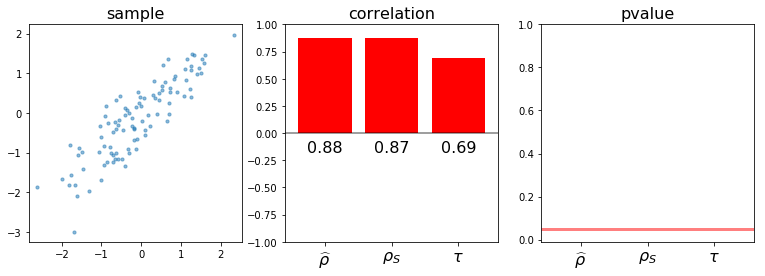

Истинная корреляция: 1.0


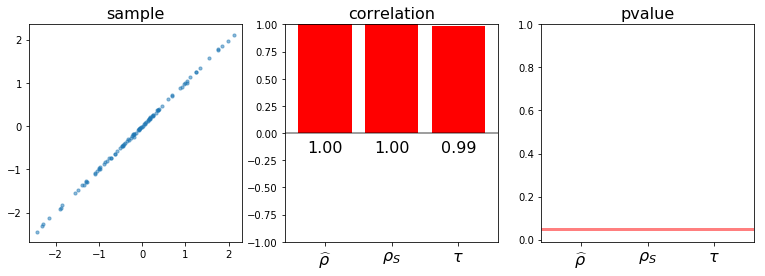

In [356]:
for i in range(11):
    cov = 0.1 * i if i < 10 else 0.9999
    print('Истинная корреляция: %.1f' % cov)
    x1, x2 = sps.multivariate_normal(cov=[[1, cov], [cov, 1]]).rvs(size=100).T
    draw_graphics(x1, x2)

Выборка размера 500 из двумерного нормального распределения.

Истинная корреляция: 0.0


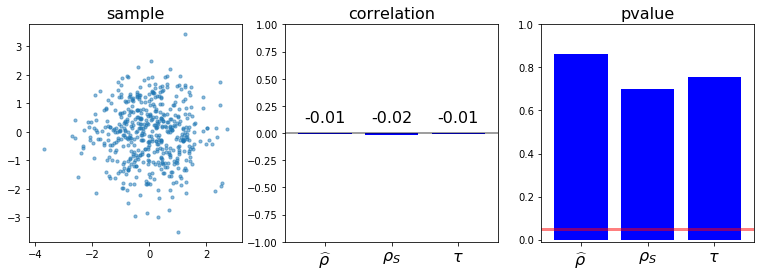

Истинная корреляция: 0.1


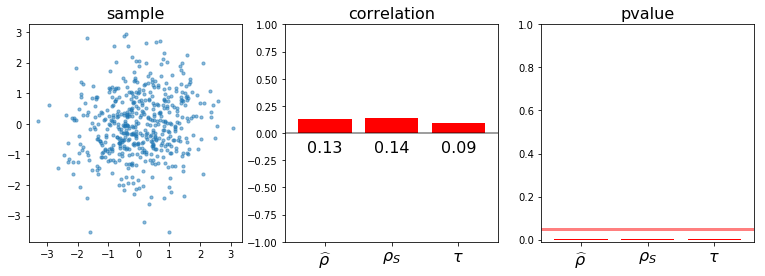

Истинная корреляция: 0.2


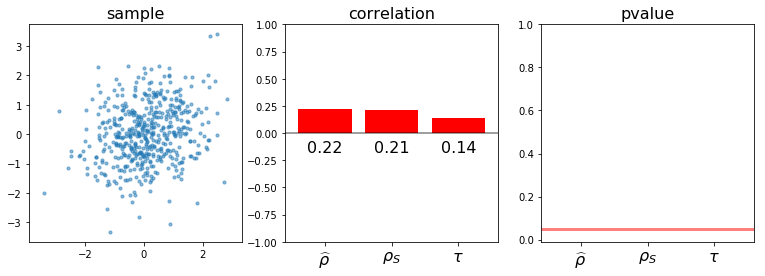

Истинная корреляция: 0.3


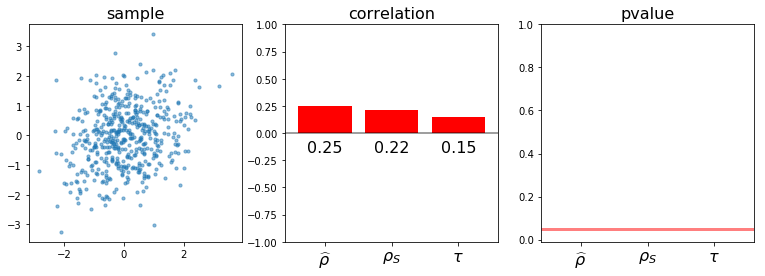

Истинная корреляция: 0.4


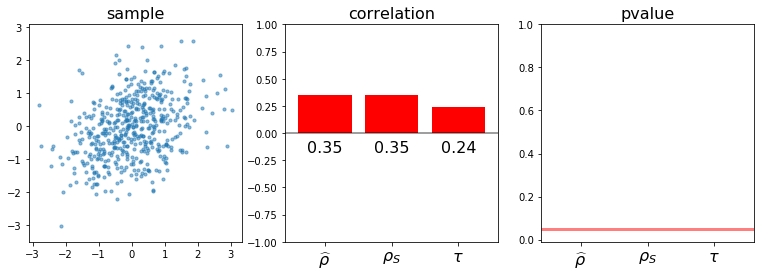

Истинная корреляция: 0.5


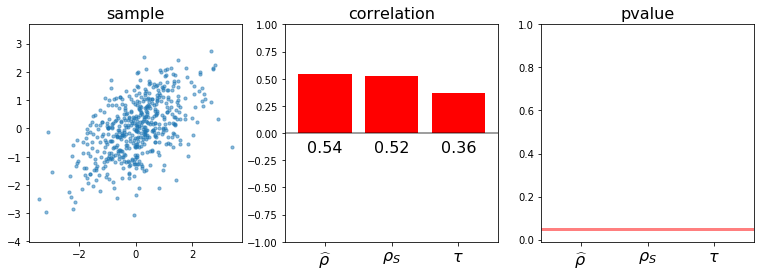

Истинная корреляция: 0.6


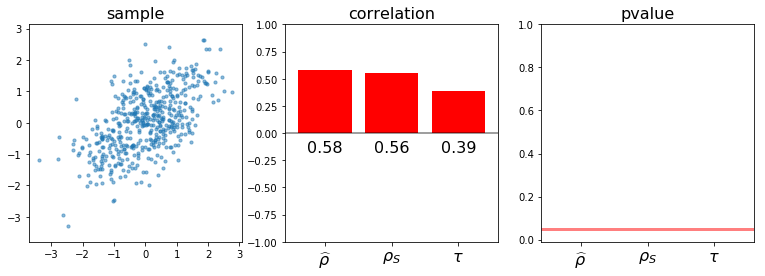

Истинная корреляция: 0.7


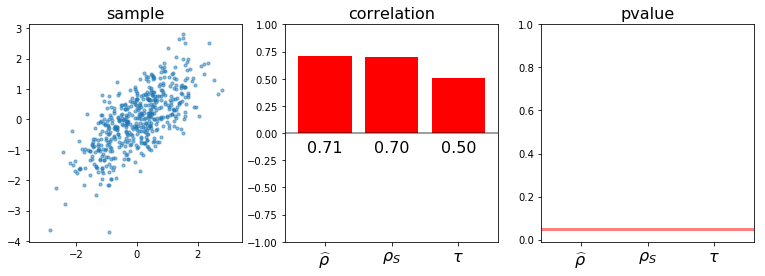

Истинная корреляция: 0.8


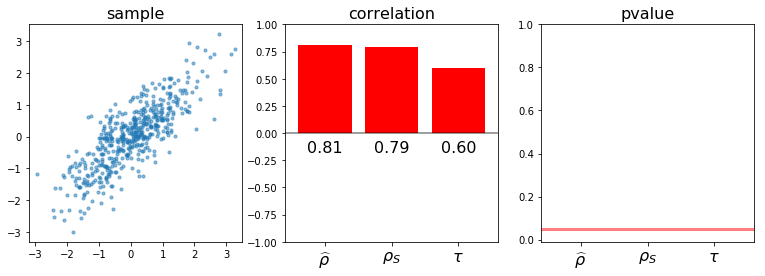

Истинная корреляция: 0.9


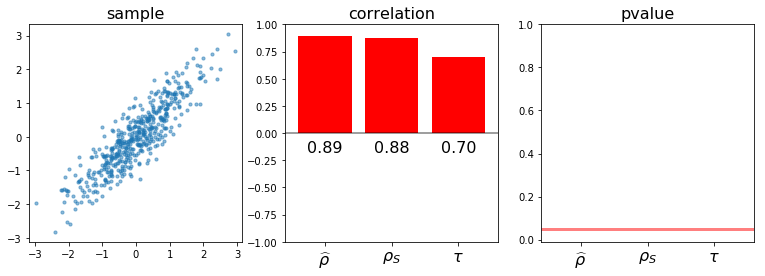

Истинная корреляция: 1.0


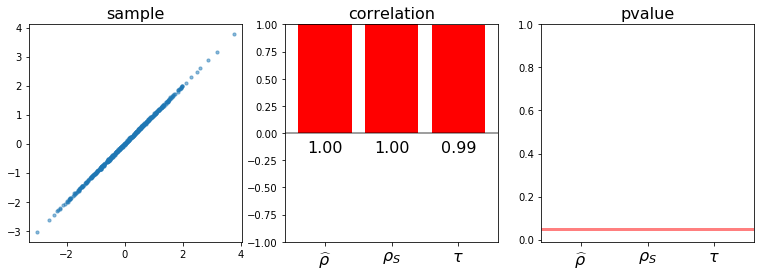

In [357]:
for i in range(11):
    cov = 0.1 * i if i < 10 else 0.9999
    print('Истинная корреляция: %.1f' % cov)
    x1, x2 = sps.multivariate_normal(cov=[[1, cov], [cov, 1]]).rvs(size=500).T
    draw_graphics(x1, x2)

Выборка размера 20 из двумерного нормального распределения. При малых значениях корреляции гипотеза о независимости не отвергается в отличии от выборки большего размера.

Истинная корреляция: 0.0


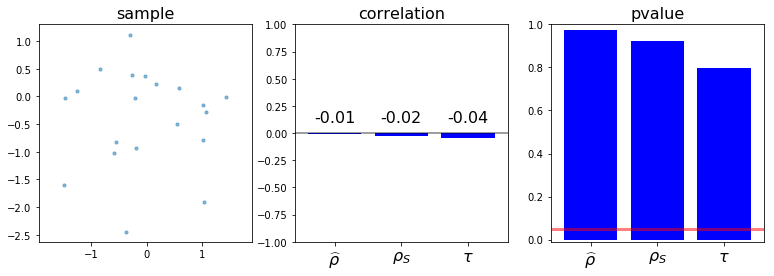

Истинная корреляция: 0.1


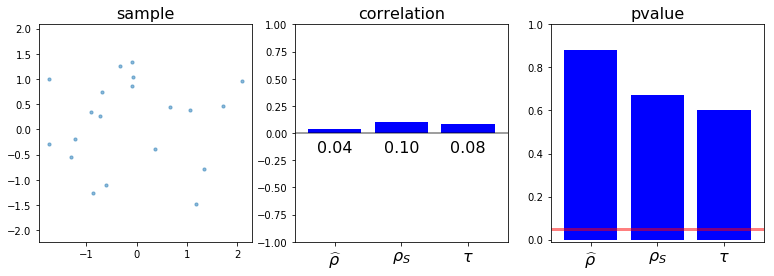

Истинная корреляция: 0.2


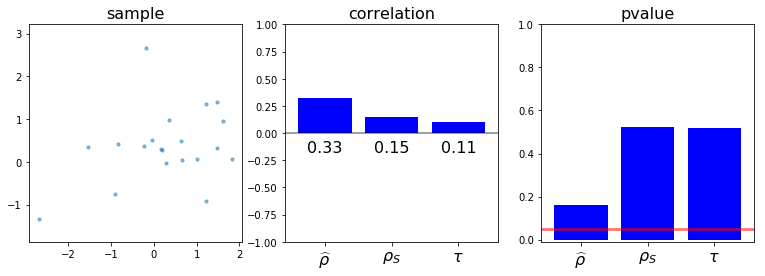

Истинная корреляция: 0.3


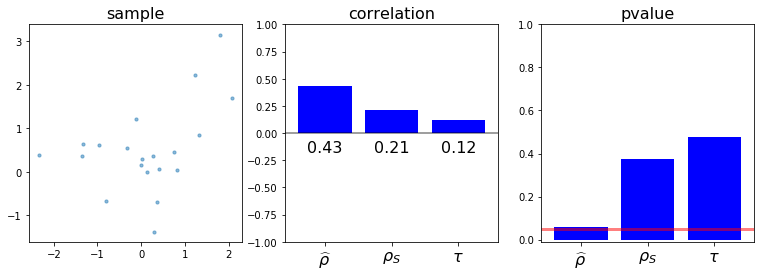

Истинная корреляция: 0.4


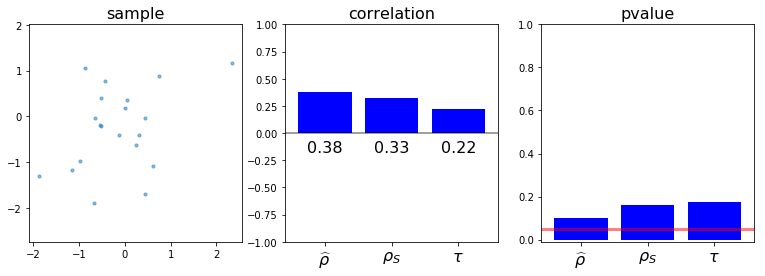

Истинная корреляция: 0.5


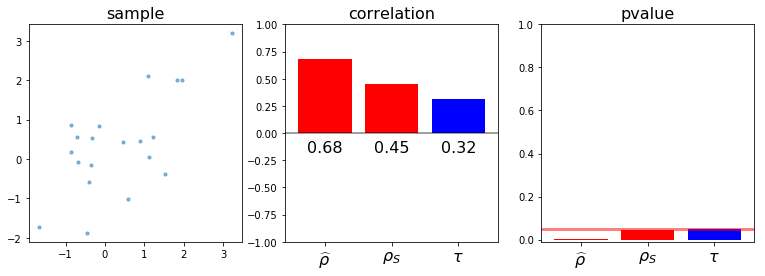

Истинная корреляция: 0.6


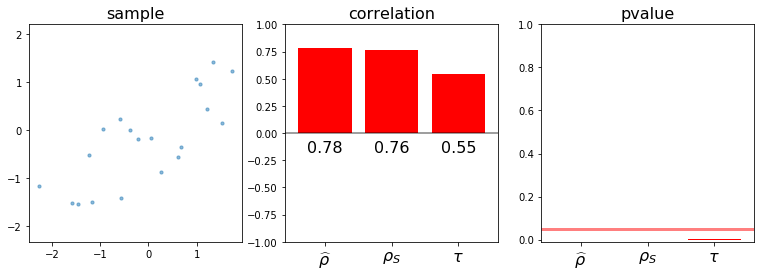

Истинная корреляция: 0.7


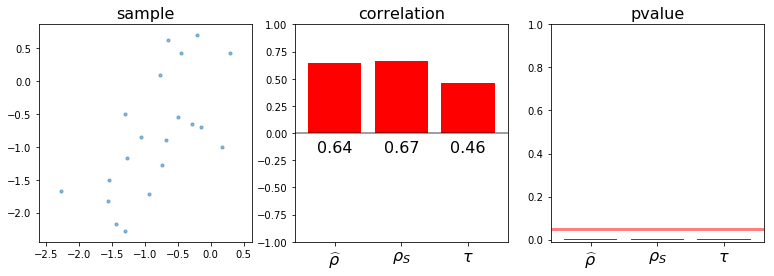

Истинная корреляция: 0.8


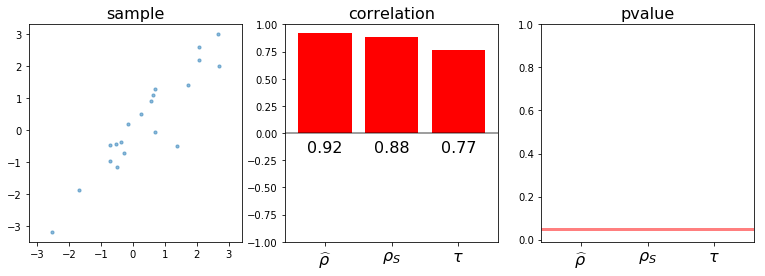

Истинная корреляция: 0.9


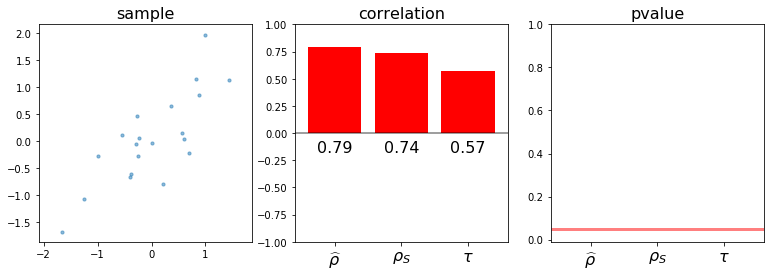

Истинная корреляция: 1.0


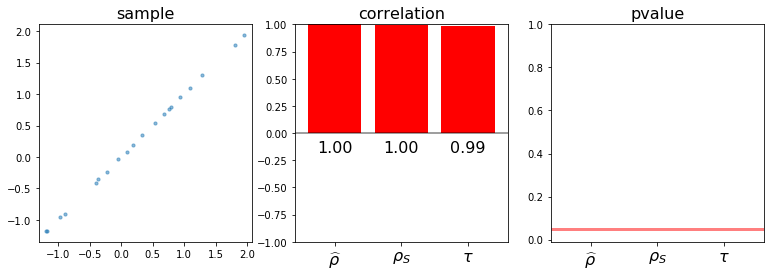

In [358]:
for i in range(11):
    cov = 0.1 * i if i < 10 else 0.9999
    print('Истинная корреляция: %.1f' % cov)
    x1, x2 = sps.multivariate_normal(cov=[[1, cov], [cov, 1]]).rvs(size=20).T
    draw_graphics(x1, x2)

Выборки "X". Очевидно, они зависимы, но коэффициенты корреляции близки к нулю.

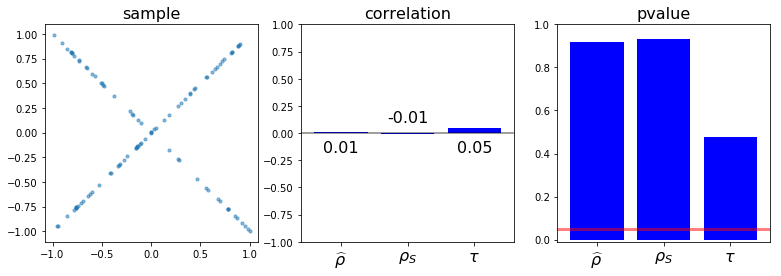

In [359]:
x1 = sps.uniform(loc=-1, scale=2).rvs(size=100)
x2 = x1 * (1 - 2 * sps.bernoulli(0.5).rvs(size=100))
draw_graphics(x1, x2)

При круговой зависимости выполняется аналогичное свойство.

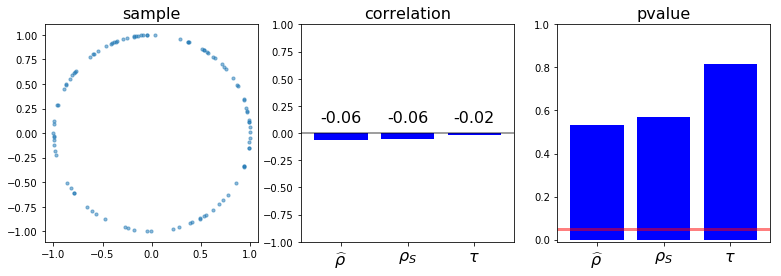

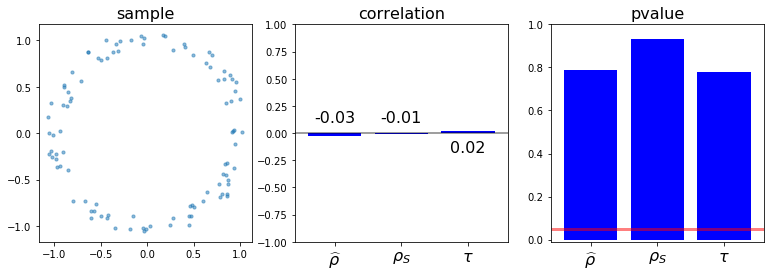

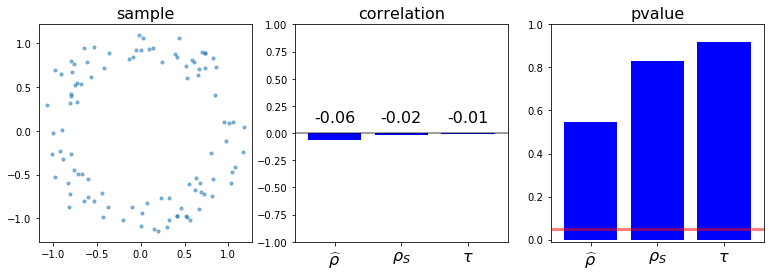

In [360]:
for i in range(3):
    phi = sps.uniform(loc=-1, scale=2).rvs(size=100)
    r = 1 + sps.uniform(loc=-0.1*i, scale=0.2*i).rvs(size=100)
    draw_graphics(r * np.cos(np.pi * phi), r * np.sin(np.pi * phi))

Несколько других примеров

In [361]:
from sklearn.datasets import make_circles, make_blobs

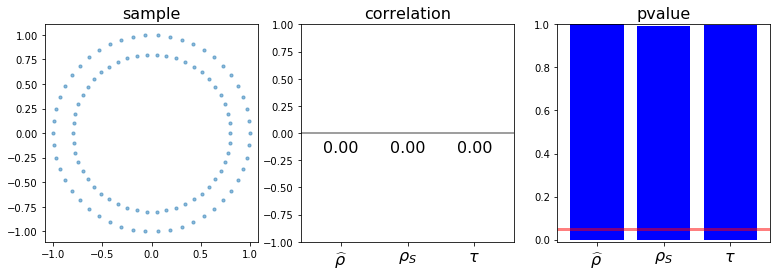

In [362]:
x, y = make_circles(n_samples=100)[0].T
draw_graphics(x, y)

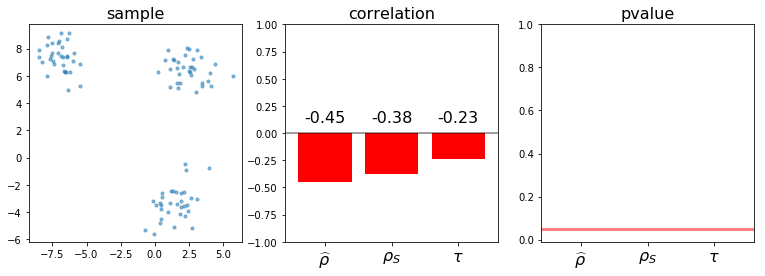

In [363]:
x, y = make_blobs(n_samples=100)[0].T
draw_graphics(x, y)

Пусть выборки линейно зависимы, но при этом случился один выброс (в левом верхнем углу). Коэффициент корреляции Пирсона близок к нулю, несмотря на очевидную зависимость данных. Остальные коэффициенты корреляции не сильно влияют на выброс.

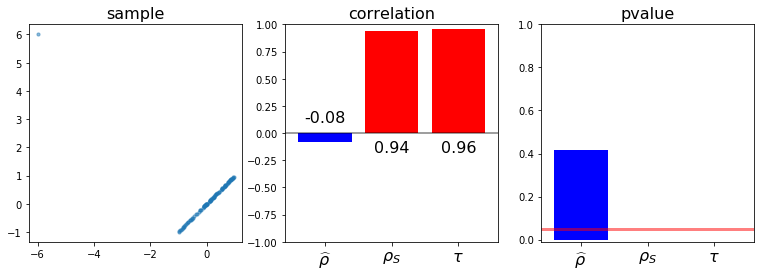

In [364]:
x1 = sps.uniform(loc=-1, scale=2).rvs(size=100)
x2 = np.array(x1)
x1[-1] = -6
x2[-1] = 6
draw_graphics(x1, x2)

Если выбор "слишком большой", то коэффициент корреляции Пирсона может быть близок к -1, что означает отрицательную линейную зависимость, несмотря на то, что на самом деле она положительна. Другие два коэффициента корреляции практически не меняются.

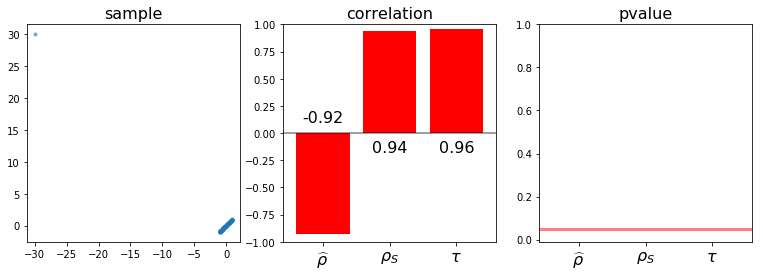

In [365]:
x1 = sps.uniform(loc=-1, scale=2).rvs(size=100)
x2 = np.array(x1)
x1[-1] = -30
x2[-1] = 30
draw_graphics(x1, x2)

<a href="https://upload.wikimedia.org/wikipedia/commons/0/02/Correlation_examples.png">Еще несколько примеров с Википедии</a>

<a href="http://guessthecorrelation.com">**Игра - отгадайте значение коэффициента корреляции Пирсона по выборке.**</a>

### Частная корреляция

Даны выборки $X = (X_1, ..., X_n), Y = (Y_1, ..., Y_n), Z = (Z_1, ..., Z_n)$. Выборки $X$ и $Y$ могут быть зависимы, однако эта зависимость может быть вызвана выборкой $Z$. То есть как $X$ так и $Y$ непосредственно зависят от $Z$. При этом при фиксированном значении $Z$ выборки $X$ и $Y$ могут оказаться незавимисыми (т.е. условно независимы; см. графические модели). Эту зависимость от $Z$ можно "снять" при помощи частной корреляции
$$corr\left(\left.\xi, \eta \right| \zeta\right) = \frac{corr(\xi, \eta) - corr(\xi, \zeta) corr(\eta, \zeta)}{\sqrt{\left(1 - corr^2(\xi, \zeta)\right)\left(1 - corr^2(\eta, \zeta)\right)}}$$

Он равен $corr(\xi', \eta')$, где $\xi'=\xi-a\zeta, \eta'=\eta-b\zeta, corr(\xi', \zeta)=0, corr(\eta', \zeta)=0.$

Соответствующий выборочный коэффициент корреляции
$$\widehat{\rho}\left(\left.X, Y \right| Z\right) = \frac{\widehat{\rho}(X, Y) - \widehat{\rho}(X, Z) \widehat{\rho}(Y, Z)}{\sqrt{\left(1 - \widehat{\rho}^2(X, Z)\right)\left(1 - \widehat{\rho}^2(Y, Z)\right)}}$$

Для большего количества выборок рекуррентная формула определяется аналогично.

Для нормальных выборок при справедливости гипотезы условной независимости величина $\frac{\widehat{\rho}\left(\left.X, Y \right| Z\right)\sqrt{n-d-2}}{\sqrt{1 - \widehat{\rho}^2\left(\left.X, Y \right| Z\right)}}$ имеет распределение Стьюдента с $n-d-2$ степенью свободы, где $d$ --- размерность $Z$.

Сгененируем три выборки так, чтобы x2 и x3 непосредственно зависили только от x1. Все выборочные корреляции для всех пар выборок принимают достаточно большие значения.

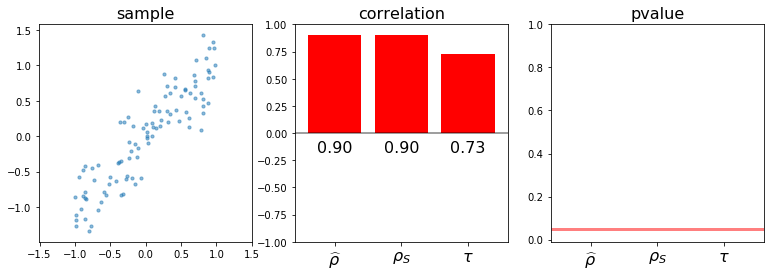

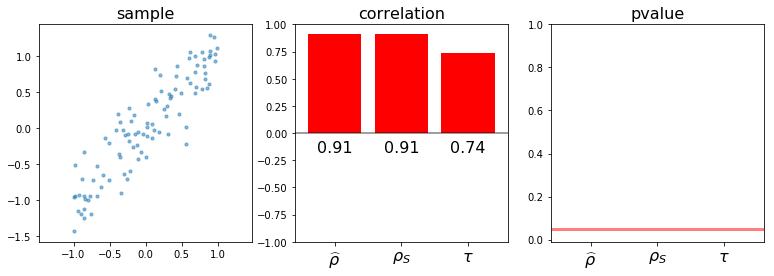

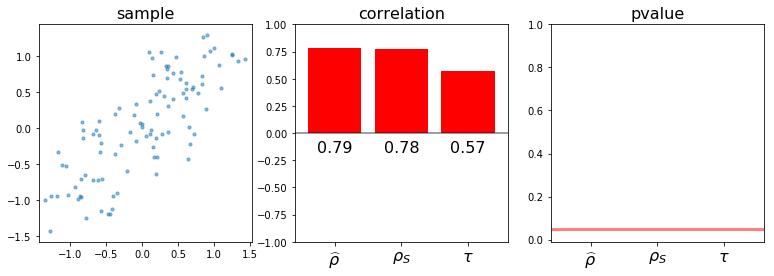

In [366]:
x1 = sps.uniform(loc=-1, scale=2).rvs(size=100)
x2 = x1 + sps.norm(loc=0, scale=0.3).rvs(size=100)
x3 = x1 + sps.norm(loc=0, scale=0.3).rvs(size=100)
draw_graphics(x1, x2)
draw_graphics(x1, x3)
draw_graphics(x2, x3)

Однако, частный коэффициент корреляции выборок x2 и x3 при условии x1 невелик.

In [368]:
part_corr = (np.corrcoef(x2, x3)[0, 1] - np.corrcoef(x1, x2)[0, 1] * np.corrcoef(x1, x3)[0, 1]) \
            / np.sqrt((1 - np.corrcoef(x1, x2)[0, 1]**2) * (1 - np.corrcoef(x1, x3)[0, 1]**2))
print('%.3f' % part_corr)

-0.212


Соответствующее pvalue не мало.

In [369]:
size = 100
T = part_corr * np.sqrt(size - 3) / np.sqrt(1 - part_corr ** 2)
pvalue = sps.t(df=size-3).sf(T)
print('%.3f' % pvalue)

0.983


Теперь пусть x3 непосредственно зависит только от x2, а не от x1.

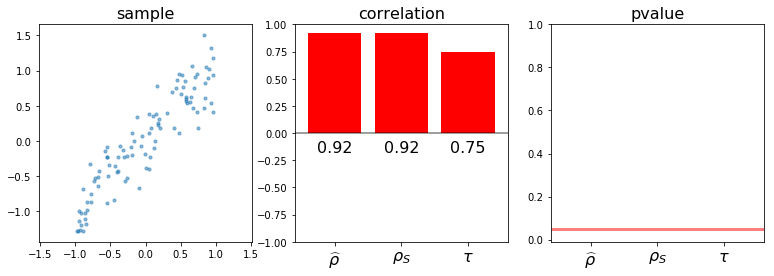

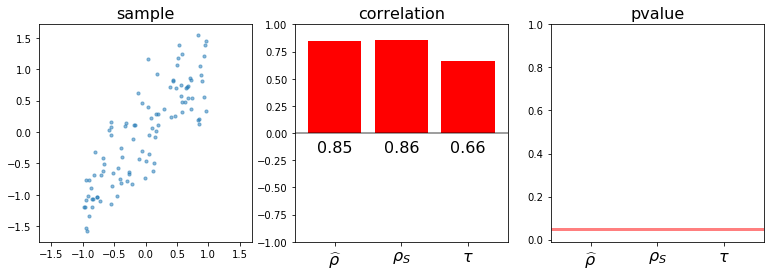

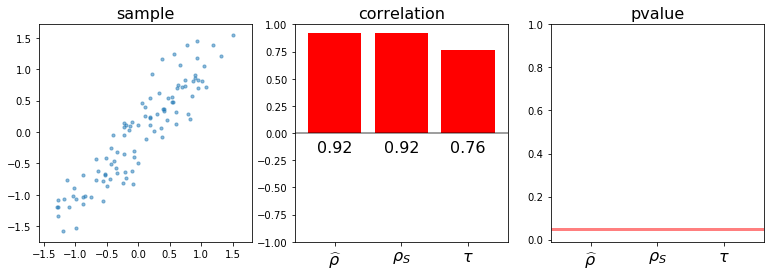

In [370]:
x1 = sps.uniform(loc=-1, scale=2).rvs(size=100)
x2 = x1 + sps.norm(loc=0, scale=0.3).rvs(size=100)
x3 = x2 + sps.norm(loc=0, scale=0.3).rvs(size=100)
draw_graphics(x1, x2)
draw_graphics(x1, x3)
draw_graphics(x2, x3)

В этом случае частный коэффициент корреляции немалый.

In [371]:
part_corr = (np.corrcoef(x2, x3)[0, 1] - np.corrcoef(x1, x2)[0, 1] * np.corrcoef(x1, x3)[0, 1]) \
            / np.sqrt((1 - np.corrcoef(x1, x2)[0, 1]**2) * (1 - np.corrcoef(x1, x3)[0, 1]**2))
print('%.3f' % part_corr)

0.672


In [372]:
size = 100
T = part_corr * np.sqrt(size - 3) / np.sqrt(1 - part_corr ** 2)
pvalue = sps.t(df=size-3).sf(T)
print('%.3f' % pvalue)

0.000


### Критерий хи-квадрат

Даны выборки $X = (X_1, ..., X_n), Y = (Y_1, ..., Y_n)$

$H_0:$ выборки независимы

$H_0:$ выборки зависимы

Этот критерий позволяет проверить именно независимость, а не некоррелированность.

Реализация:

<a href=https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html#scipy.stats.chi2_contingency>
`chi2_contingency`</a>`(observed, correction)`

`observed` --- таблица сопряженности

`correction` --- корректировка степеней свободы

Возвращает:

`chi2` --- значение статистики

`p` --- pvalue

`dof = observed.size - sum(observed.shape) + observed.ndim - 1` --- число степеней свободы

`expected` --- ожидаемые частоты на основе сумм по строкам и столбцам таблицы

Простой пример независимых выборок

In [2]:
x1 = sps.binom(n=10, p=0.4).rvs(size=1000)
x2 = sps.randint(low=0, high=6).rvs(size=1000)
observed = np.histogram2d(x1, x2, bins=[len(np.unique(x1)), len(np.unique(x2))])[0]
sps.chi2_contingency(observed)[:2]

NameError: name 'sps' is not defined

Зависимые выборки

In [334]:
x1 = sps.binom(n=10, p=0.4).rvs(size=1000)
x2 = sps.randint(low=0, high=6).rvs(size=1000) * (x1 > 1)
observed = np.histogram2d(x1, x2, bins=[len(np.unique(x1)), len(np.unique(x2))])[0]
sps.chi2_contingency(observed)[:2]

(262.60660212293794, 1.6035630135059253e-34)

Если в примере "X" дискретизировать выборку, то гипотеза о независимости отвергается. Под дискретизацией понимается разбивание области прямоугольной сеткой. Значения в таблице сопряженности --- количество элементов, попавших в соответствующий квадрат разбиения.

In [343]:
observed = (np.eye(10) + np.eye(10)[::-1]) * sps.poisson(mu=30).rvs(size=(10, 10))
observed

array([[ 35.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  38.],
       [  0.,  35.,   0.,   0.,   0.,   0.,   0.,   0.,  35.,   0.],
       [  0.,   0.,  28.,   0.,   0.,   0.,   0.,  24.,   0.,   0.],
       [  0.,   0.,   0.,  33.,   0.,   0.,  33.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,  32.,  40.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,  35.,  33.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,  30.,   0.,   0.,  37.,   0.,   0.,   0.],
       [  0.,   0.,  39.,   0.,   0.,   0.,   0.,  21.,   0.,   0.],
       [  0.,  31.,   0.,   0.,   0.,   0.,   0.,   0.,  46.,   0.],
       [ 33.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  30.]])

In [344]:
sps.chi2_contingency(observed)[:2]

(2693.4257148794882, 0.0)